

## Assignment 2: Data, Grammar and Engineering

**AMS MADE YMS31303**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>

---



In [47]:
#import packages that might be needed throughout the assignment
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import os             
import pandas as pd   
import numpy as np      
import seaborn as sns  
import os              

## Question 1

We will work with data from the Guardian's version of [Wikileaks' Afghanistan war logs](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism). The table is stored on a GoogleDoc on the following address:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

Write a Python code snippet using IPython.display to embed this Google Sheet directly into a Jupyter notebook for easy reference and interaction.

In [48]:
# question 1
#import module to display webpages
from IPython.display import IFrame
#import webpage
IFrame('https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en&gid=1#gid=1', 700, 500)


## Question 2
a) Save the csv file to your compluter and Load the data in Tab "TOTAL Casualties".

b) Display the first 5 rows of the dataset using .head().

c) Extract the column names and create a dictionary where each column name is the key, and the first value in that column is the value.

## 2a loading data

In [49]:
dp = 'data/assignment2' #load data path
os.listdir(dp) #check data path


['Wikileaks Afghanistan war logs analysis - TOTAL CASUALTIES, ALL CAUSES.csv']

## 2b display first 5 rows of dataset

In [66]:
data_casual = 'data/assignment2/Wikileaks Afghanistan war logs analysis - TOTAL CASUALTIES, ALL CAUSES.csv'
db_casual = pd.read_csv(data_casual, index_col= ['Year','Month'], skiprows= 1, skipfooter=1) #insert data from csv file & set 1 row as index & drop first and last row

for col in db_casual.columns[:]:  #for all columns 
    db_casual[col] = pd.to_numeric(db_casual[col], errors='coerce') #transform data to numerical data

#show first 5 rows
db_casual.head() #show first 5 rows

C:\Users\rmeij\AppData\Local\Temp\ipykernel_29120\1116564621.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  db_casual = pd.read_csv(data_casual, index_col= ['Year','Month'], skiprows= 1, skipfooter=1) #insert data from csv file & set 1 row as index & drop first and last row


Taliban  Civilians  Afghan forces  \
Year Month                                         
2004 January      15.0         51           23.0   
     February      NaN          7            4.0   
     March        19.0          2            NaN   
     April         5.0          3           19.0   
     May          18.0         29           56.0   

               Nato (detailed in spreadsheet)  Nato - official figures  
Year Month                                                              
2004 January                              NaN                       11  
     February                             5.0                        2  
     March                                2.0                        3  
     April                                NaN                        3  
     May                                  6.0                        9

## 2c create dictionary

In [68]:
db_casual_reset = db_casual.reset_index() #reset index
dict_casual = db_casual_reset.iloc[0].to_dict() #use reset index to show all columns as keys

dict_casual #show dictionary


{'Year': 2004,
 'Month': 'January',
 'Taliban': 15.0,
 'Civilians': 51,
 'Afghan forces': 23.0,
 'Nato (detailed in spreadsheet)': nan,
 'Nato - official figures': 11}

## Question 3
a) Plot a histogram of any numeric column from the dataset.

b) Use a kernel density plot (KDE) to visualize the distribution of another numeric column.

c) Create a bar chart of a categorical variable and discuss how the plot changes if you switch to a horizontal bar plot.

## 3a histogram from numeric column 'Civilians'

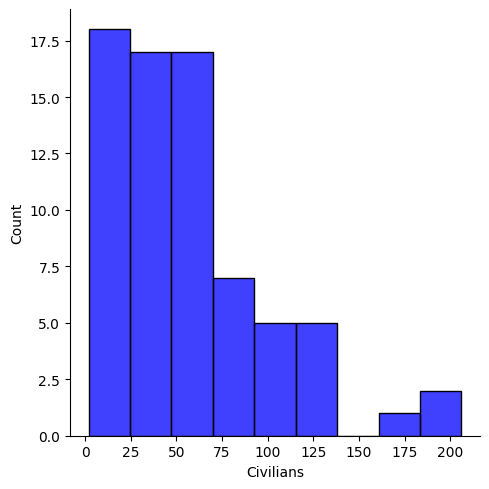

In [52]:

#code student 1: using the seaborn packages
sns.displot(db_casual['Civilians'], kde=False, color='blue');

## 3b kernel density from numeric column 'Afghan forces'

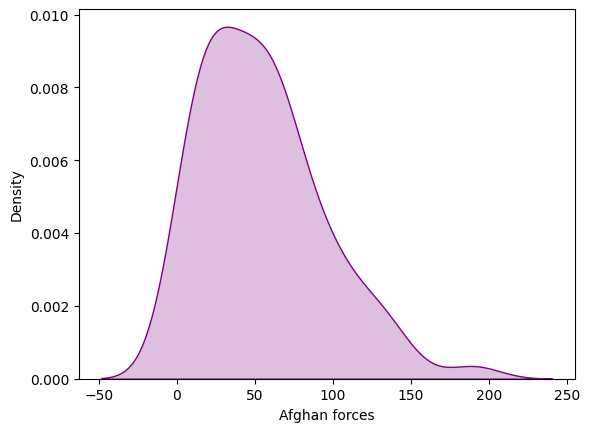

In [53]:
sns.kdeplot(db_casual['Afghan forces'], fill=True, color='purple');

## 3c bar chart of categorical variable 'Year'

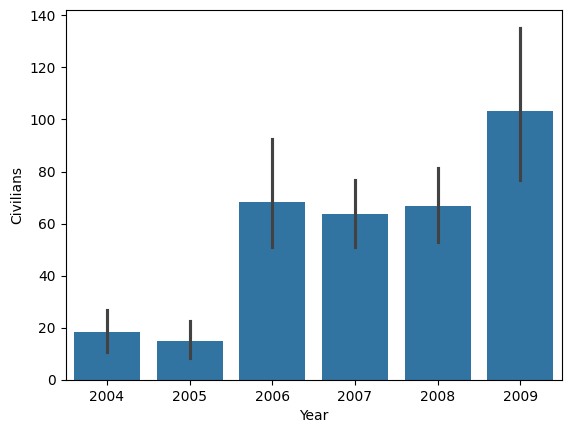

In [54]:
#code student 1: simple bar plot using seaborn
sns.barplot(x='Year', y='Civilians', data = db_casual); #barplot

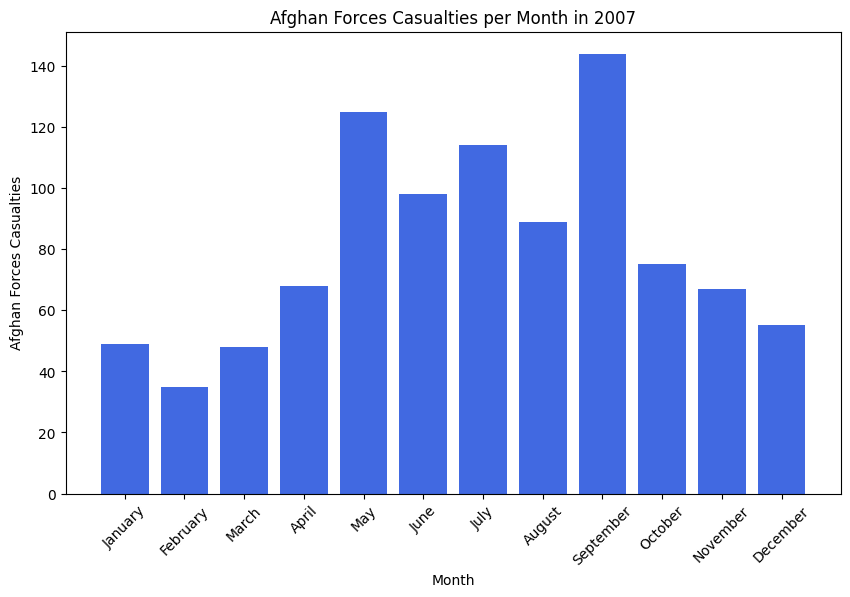

In [55]:
#code student 2: advanced barchart using matplotlib

# Filter the data for the year 2007
data_2007_fixed = db_casual_reset[db_casual_reset['Year'] == 2007] #use dataframe with reset index to select only 2007

# Create a bar chart for Afghan Forces casualties in 2007
plt.figure(figsize=(10,6))
plt.bar(data_2007_fixed['Month'], data_2007_fixed['Afghan forces'], color='royalblue')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Afghan Forces Casualties')
plt.title('Afghan Forces Casualties per Month in 2007')

# Rotate month names for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

We included the codes of both students to show the possibilities of plotting. Student 1 shows a quick way to plot something, whereas student 2 uses more code to create a more complex plot.


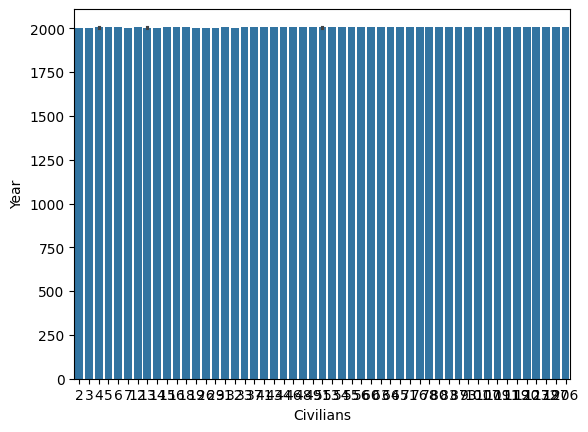

In [56]:
sns.barplot(y='Year', x='Civilians', data = db_casual); #horizontal barplot

*the plot changes since the x variable is not a categorical variable anymore*

## Question 4
a) Write a loop that iterates through each row of a DataFrame and prints the value of one specific column.

b) Modify the loop so that it extracts rows where a numeric column value is greater than a threshold and stores these rows in a new DataFrame.

## 4a iterative loop

In [73]:
#code student 1
for index, row in db_casual.iterrows():
    print(row['Civilians']) #print values of Civilians column


51.0
7.0
2.0
3.0
29.0
32.0
19.0
26.0
4.0
14.0
19.0
13.0
4.0
4.0
18.0
5.0
49.0
31.0
5.0
6.0
12.0
15.0
13.0
16.0
93.0
54.0
37.0
33.0
54.0
71.0
64.0
101.0
172.0
44.0
46.0
51.0
53.0
33.0
48.0
123.0
71.0
80.0
83.0
65.0
64.0
46.0
60.0
37.0
43.0
120.0
41.0
55.0
54.0
51.0
120.0
46.0
63.0
56.0
78.0
76.0
31.0
46.0
64.0
44.0
109.0
111.0
119.0
206.0
197.0
107.0
120.0
87.0


In [72]:
#code student 2
for index, row in db_casual.iterrows():
    print(f"Row {index}: Civilians = {row['Civilians']}")

#this code shows a more detailed description of the column

Row (2004, 'January'): Civilians = 51.0
Row (2004, 'February'): Civilians = 7.0
Row (2004, 'March'): Civilians = 2.0
Row (2004, 'April'): Civilians = 3.0
Row (2004, 'May'): Civilians = 29.0
Row (2004, 'June'): Civilians = 32.0
Row (2004, 'July'): Civilians = 19.0
Row (2004, 'August'): Civilians = 26.0
Row (2004, 'September'): Civilians = 4.0
Row (2004, 'October'): Civilians = 14.0
Row (2004, 'November'): Civilians = 19.0
Row (2004, 'December'): Civilians = 13.0
Row (2005, 'January'): Civilians = 4.0
Row (2005, 'February'): Civilians = 4.0
Row (2005, 'March'): Civilians = 18.0
Row (2005, 'April'): Civilians = 5.0
Row (2005, 'May'): Civilians = 49.0
Row (2005, 'June'): Civilians = 31.0
Row (2005, 'July'): Civilians = 5.0
Row (2005, 'August'): Civilians = 6.0
Row (2005, 'September'): Civilians = 12.0
Row (2005, 'October'): Civilians = 15.0
Row (2005, 'November'): Civilians = 13.0
Row (2005, 'December'): Civilians = 16.0
Row (2006, 'January'): Civilians = 93.0
Row (2006, 'February'): Civil

## 4b create new DataFrame with threshold values

In [59]:
threshold = 85
high_civilian_casualties = []

for index, row in db_casual.iterrows():
    if row['Civilians'] > threshold:
        high_civilian_casualties.append(row)

df_high_civilian_casualties = pd.DataFrame(high_civilian_casualties)
df_high_civilian_casualties.head()

Taliban  Civilians  Afghan forces  \
2006 January       26.0       93.0           14.0   
     August       161.0      101.0           42.0   
     September    945.0      172.0           97.0   
2007 April        166.0      123.0           68.0   
2008 February     139.0      120.0           35.0   

                Nato (detailed in spreadsheet)  Nato - official figures  
2006 January                               1.0                      1.0  
     August                               18.0                     29.0  
     September                            19.0                     38.0  
2007 April                                26.0                     20.0  
2008 February                              7.0                      7.0

## Question 5
a) Create a list containing the names "Civilians" and "Afghan forces"

b) From the imported data keep the the values from these two columns only. Keep in mind that "Year" and "Month" identify each column and sould remain in the dataset.

c) Obtain a monthly total count of casualties for these two groups and create a line and a bar plot of them.


## 5a create list with names 'Civilians' and 'Afghan forces'

In [60]:
civilians_afghanforces = ['Civilians', 'Afghan_Forces'] #create list
print(civilians_afghanforces) #print list

['Civilians', 'Afghan_Forces']


## 5b create new dataframe for civilians and afghan forces

In [61]:
db_civilian_afghan = db_casual_reset[['Year', 'Month', 'Afghan forces', 'Civilians']] #use not indexed dataframe to include all columns
db_civilian_afghan =  db_civilian_afghan.set_index(['Year', 'Month']) #set year and month as indices
db_civilian_afghan.head()

Afghan forces  Civilians
Year Month                             
2004 January            23.0         51
     February            4.0          7
     March               NaN          2
     April              19.0          3
     May                56.0         29

## 5c monthly count of casualties 

In [84]:
#include total count of casualties
db_civilian_afghan['Total']= db_civilian_afghan['Civilians']+ db_civilian_afghan['Afghan forces']

db_civilian_afghan=db_civilian_afghan.reset_index()

# Combine Year and Month to create a chronological x-axis label
db_civilian_afghan['Year-Month'] = db_civilian_afghan['Year'].astype(str) + '-' + db_civilian_afghan['Month'] 
db_civilian_afghan.head()


,index,Year,Month,Afghan forces,Civilians,Total,Year-Month
0,0,2004,January,23.0,51,74.0,2004-January
1,1,2004,February,4.0,7,11.0,2004-February
2,2,2004,March,NaN,2,NaN,2004-March
3,3,2004,April,19.0,3,22.0,2004-April
4,4,2004,May,56.0,29,85.0,2004-May


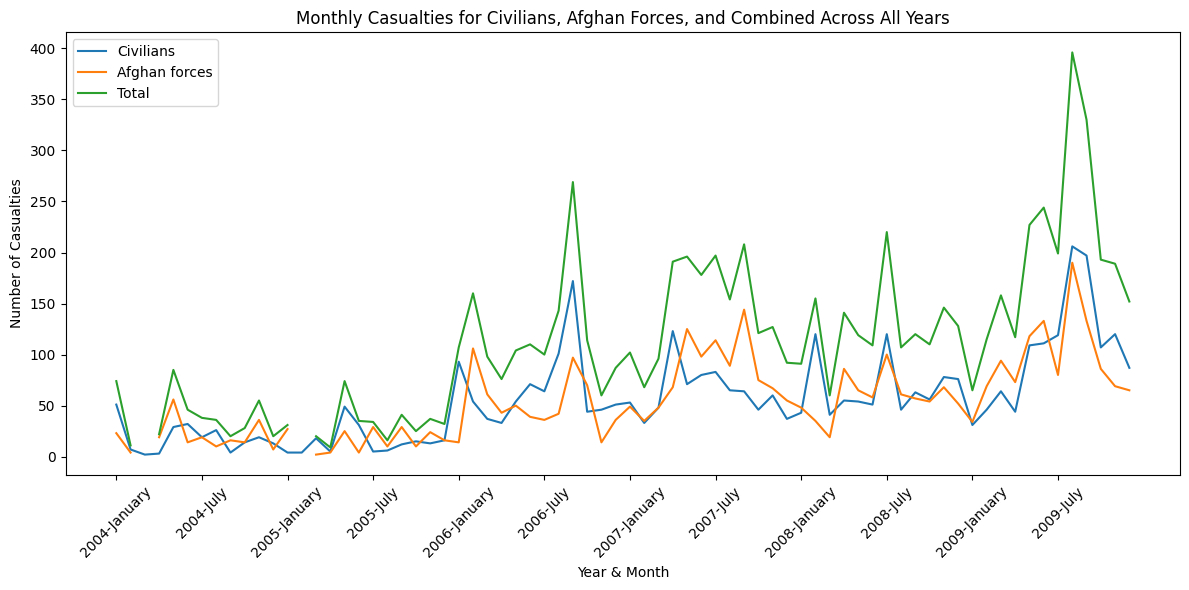

In [87]:
# Create the plot with Year-Month as the x-axis
plt.figure(figsize=(12,6))

# Plot Cthe graphs
plt.plot(db_civilian_afghan['Year-Month'], db_civilian_afghan['Civilians'], label='Civilians')
plt.plot(db_civilian_afghan['Year-Month'], db_civilian_afghan['Afghan forces'], label='Afghan forces')
plt.plot(db_civilian_afghan['Year-Month'], db_civilian_afghan['Total'], label='Total')

# Adding labels, title, and legend
plt.xlabel('Year & Month')
plt.ylabel('Number of Casualties')
plt.title('Monthly Casualties for Civilians, Afghan Forces, and Combined Across All Years')
plt.legend()

# Show fewer labels on the x-axis (every 6th month)
plt.xticks(ticks=range(0, len(db_civilian_afghan['Year-Month']), 6), labels=db_civilian_afghan['Year-Month'][::6], rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

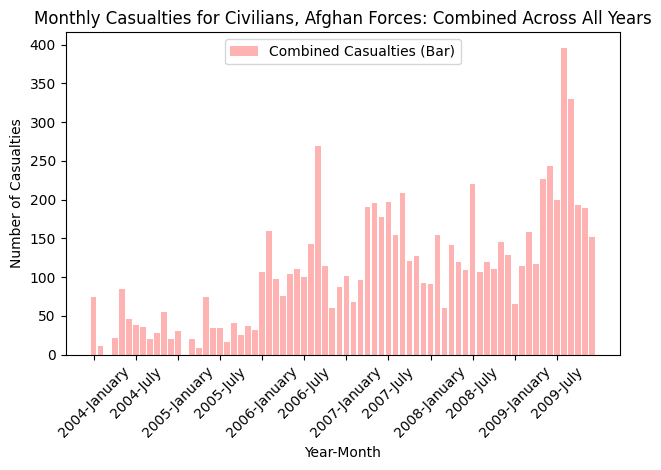

In [93]:
plt.bar(db_civilian_afghan['Year-Month'], db_civilian_afghan['Total'], alpha=0.3, label='Combined Casualties (Bar)', color='red')

# Adding labels, title, and legend
plt.xlabel('Year-Month')
plt.ylabel('Number of Casualties')
plt.title('Monthly Casualties for Civilians, Afghan Forces: Combined Across All Years')
plt.legend()

# Show fewer labels on the x-axis (every 6th month)
plt.xticks(ticks=range(0, len(db_civilian_afghan['Year-Month']), 6), labels=db_civilian_afghan['Year-Month'][::6], rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

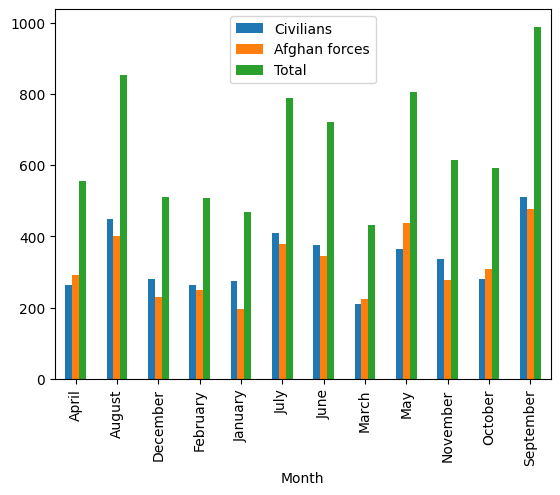

In [75]:
group_month_caf.plot(x='Month', y=['Civilians','Afghan forces','Total'], kind = "bar"); # barplot